In [20]:
import math
import random

lambda_h = 0.4    # honest mining rate
lambda_a = 0.2    # adversarial mining rate
rate = lambda_h + lambda_a   # total mining rate
p = lambda_h/rate  # probability of success
k = 6 # confirmation depth
prob_violation_start = (math.factorial(2*k + 1)/
                        (math.factorial(k+1) * math.factorial(k))) * (lambda_a/(lambda_a+lambda_h))**(k+1) * (lambda_h/(lambda_a+lambda_h))**k

# nmax = round(k * 3 * rate / lambda_a)
nmax = 1000
ntrials = 10000
first_violation = 0

for nt in range(0, ntrials):
    a_num = 0
    h_num = 0
    num = 0

    for count in range (1, nmax):
        num = count
        if random.random() < p:
            h_num += 1
        else:
            a_num += 1

        if h_num == (k+1):
            a_num = 0
            h_num = 0
        elif a_num == (k+1):
            break
        else:
            prob_violation = (math.factorial(2*k + 1 - a_num - h_num)/
                              (math.factorial(k+1 - a_num) * math.factorial(k - h_num))) * (lambda_a/(lambda_a+lambda_h))**(k+1 - a_num) * (lambda_h/(lambda_a+lambda_h))**(k - h_num)

            if prob_violation < prob_violation_start:
                a_num = 0
                h_num = 0

    first_violation += num

print(nmax)
print(first_violation/ntrials)

1000
67.6599


In [144]:
import pandas as pd

data = pd.read_csv('analysis.csv')


In [22]:
import statsmodels.formula.api as smf

model = smf.ols(formula='first_violation ~ p + k', data=data).fit()
 
# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        first_violation   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     3.719
Date:                Sun, 12 Mar 2023   Prob (F-statistic):             0.0277
Time:                        17:42:06   Log-Likelihood:                -1310.4
No. Observations:                 101   AIC:                             2627.
Df Residuals:                      98   BIC:                             2635.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.43e+05   6.48e+04     -2.207      0.0

In [34]:
df = data
df['p_squared'] = data['p']**2

model = smf.ols(formula='first_violation ~ p_squared + k', data=df).fit()
 
# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        first_violation   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     5.249
Date:                Sun, 12 Mar 2023   Prob (F-statistic):            0.00683
Time:                        17:45:18   Log-Likelihood:                -1309.0
No. Observations:                 101   AIC:                             2624.
Df Residuals:                      98   BIC:                             2632.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.096e+05   4.04e+04     -2.711      0.0

In [54]:
df = data
df['p_squared'] = data['p']**2
df['k_log'] = list(map(math.log, data['k'].to_list()))

model = smf.ols(formula='first_violation ~ p_squared + k_log', data=df).fit()
 
# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        first_violation   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     5.403
Date:                Sun, 12 Mar 2023   Prob (F-statistic):            0.00596
Time:                        17:50:46   Log-Likelihood:                -1296.3
No. Observations:                 100   AIC:                             2599.
Df Residuals:                      97   BIC:                             2606.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.414e+05   5.07e+04     -2.786      0.0

/var/folders/my/p5qwqq_51pq8vxfjp9wy0tmc0000gn/T/ipykernel_4725/805361636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['p_squared'] = data['p']**2
/var/folders/my/p5qwqq_51pq8vxfjp9wy0tmc0000gn/T/ipykernel_4725/805361636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['k_log'] = list(map(math.log, data['k'].to_list()))


In [51]:
data = data.iloc[1:]

In [53]:
import numpy as np
data['k']
list(map(math.log, data['k'].to_list()))
data['k_log'] = list(map(math.log, data['k'].to_list()))

/var/folders/my/p5qwqq_51pq8vxfjp9wy0tmc0000gn/T/ipykernel_4725/3084424054.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['k_log'] = list(map(math.log, data['k'].to_list()))


In [57]:
import matplotlib.pyplot as plt

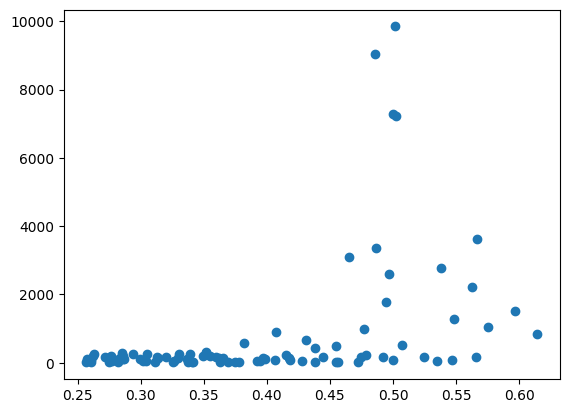

In [65]:
no_outlier_data = data[data['first_violation'] < 10000]
plt.scatter(no_outlier_data['p_squared'], no_outlier_data['first_violation'])
plt.show()

In [143]:
df = data
df['p_squared'] = data['p']**2
df['rt_p'] = data['p'] ** (1/2)
df['k_squared'] = data['k']**2
df['v_log'] = list(map(math.log, data['first_violation'].to_list()))
df['p_e'] = math.e**data['p']
df['p_cube'] = df['p'] ** 3
#df['p**k'] = data['p'] ** data[]

model = smf.ols(formula='v_log ~ p_cube + k + p_e*k', data=df).fit()
 
# model summary
print(model.summary())

ValueError: math domain error

In [149]:
df = data
df['p_squared'] = data['p']**2
df['rt_p'] = data['p'] ** (1/2)
df['k_squared'] = data['k']**2
df['v_log'] = list(map(math.log, data['first_violation'].to_list()))
df['p_e'] = math.e**data['p']
df['p_cube'] = df['p'] ** 3
#df['p**k'] = data['p'] ** data[]
df['p_five_half'] = df['p'] ** (5/2)
df['p_log'] = list(map(math.log, data['p'].to_list()))
data['q'] = 1 - p
df['q_log'] = list(map(math.log, data['q'].to_list()))
df['q_half'] = data['q'] ** (1/2)
df['p_half'] = data['p'] ** (1/2)
df['p_five_half_log'] = list(map(math.log, df['p_five_half'].to_list()))
df['p_cube_log'] = list(map(math.log, df['p_cube'].to_list()))
df['p_half_log'] = list(map(math.log, df['p_half'].to_list()))
df['q_half_log'] = list(map(math.log, df['q_half'].to_list()))

model = smf.ols(formula='v_log ~ p_five_half_log*k*p_log', data=df).fit()
 
# model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  v_log   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 6.157e+04
Date:                Mon, 13 Mar 2023   Prob (F-statistic):               0.00
Time:                        16:45:24   Log-Likelihood:                -687.70
No. Observations:                5000   AIC:                             1387.
Df Residuals:                    4994   BIC:                             1426.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [96]:
import pandas as pd
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold



In [133]:
#define predictor and response variables
X = df[["p_log", "q_log", "p_five_half_log", "p_cube_log","p_half_log","q_half_log","k"]]
y = df['v_log']

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
model = RidgeCV(alphas=arange(0.01, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

#fit model
model.fit(X, y)

#display lambda that produced the lowest test MSE
print(model.alpha_)

0.99


In [134]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)
print(coefficients)

                 0             0
0            p_log  5.820880e-01
1            q_log -1.115971e-29
2  p_five_half_log  1.455220e+00
3       p_cube_log  1.746264e+00
4       p_half_log  2.910440e-01
5       q_half_log -2.441315e-30
6                k  2.079119e-01
